## **Import Libraries**

In this cell, we import all the Python libraries we will need. These include tools to handle data (Pandas, NumPy), make charts (Matplotlib, Seaborn), scale values (MinMaxScaler), build models (TensorFlow, Keras), and measure accuracy (mean_squared_error). These libraries make it easy to clean data, build deep learning models, and show results in charts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

%matplotlib inline
pd.set_option("display.max_columns", None)


## **Load and Inspect Dataset:**

We load the exchange rate dataset using Pandas and check the shape (rows and columns) of the data. Then we use .head() to view the first few rows. This helps us quickly understand what the data looks like and what kind of values it contains.

## **Check Column Names and Nulls:**

This cell prints all the column names in the dataset and shows how many missing values (NaNs) are in each column. This step helps us find which parts of the data may need to be cleaned before we can use it.

In [2]:
df = pd.read_csv("/content/Foreign_Exchange_Rates.csv")

# Show shape and sample
print("Shape:", df.shape)
df.head()

Shape: (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


## **Rename and Convert Columns:**

Here, we rename the date column and make it the index of the dataset. We also convert all exchange rate values to numeric form. If there are any errors during conversion, we turn them into NaN values so we can handle them later.

In [3]:
print(df.columns)
df.isnull().sum()

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


,0
Unnamed: 0,0
Time Serie,0
AUSTRALIA - AUSTRALIAN DOLLAR/US$,0
EURO AREA - EURO/US$,0
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0
BRAZIL - REAL/US$,0
CANADA - CANADIAN DOLLAR/US$,0
CHINA - YUAN/US$,0
HONG KONG - HONG KONG DOLLAR/US$,0


## **Visualize Missing Data:**

This code creates a heatmap to show missing values in the dataset. Each yellow/bright line represents missing data. It's a visual way to spot which rows or columns have too many missing entries that might affect the model.

In [4]:
df.rename(columns={"Time Serie": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Convert all currency columns to numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows where all currencies are missing
df.dropna(how="all", inplace=True)

## **Drop Columns with >40% Missing Values:**

This cell removes any column that has more than 40% missing data. We do this because too many missing values make the data unreliable. After this, we print the names of the columns that are still in the dataset.

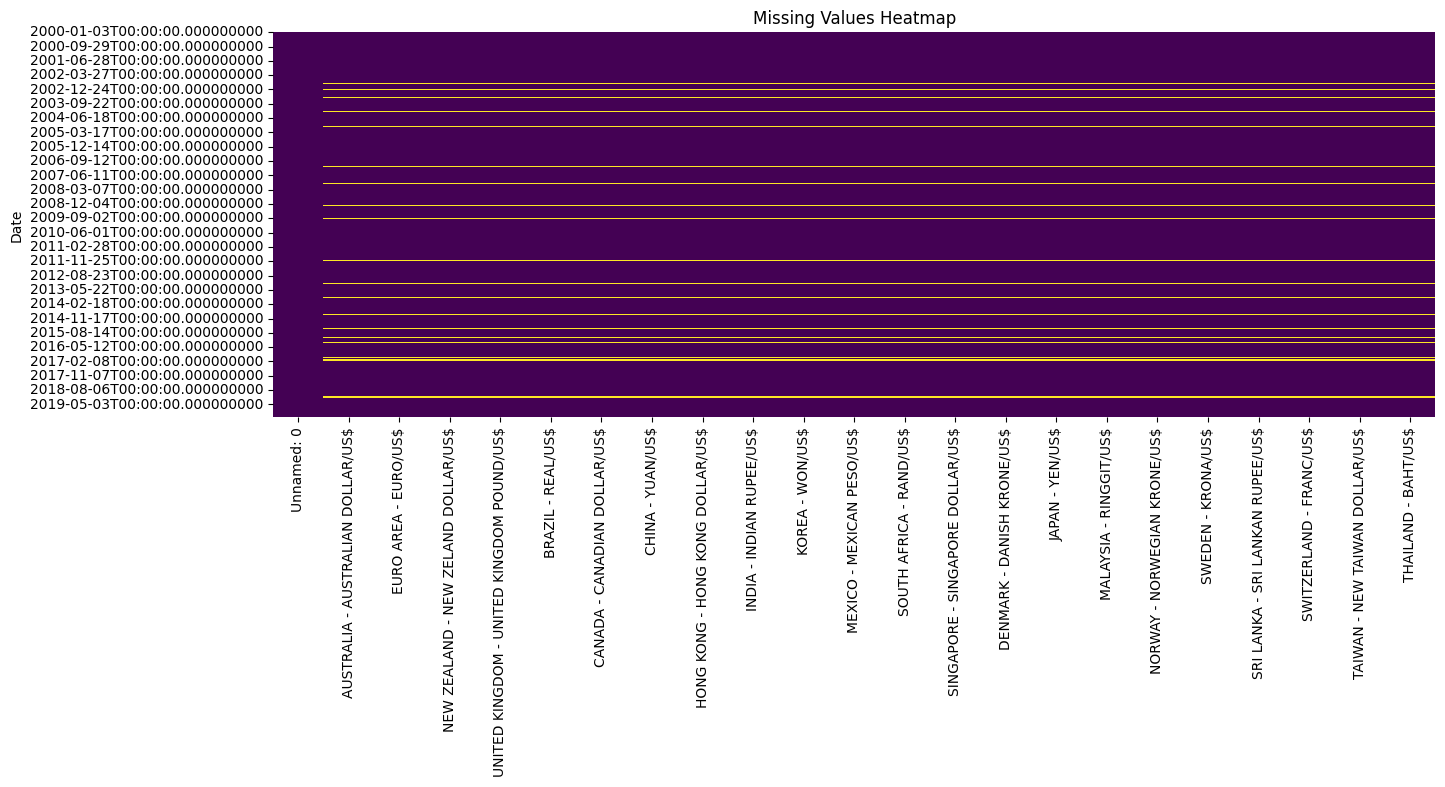

In [5]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## **Interpolate Remaining Missing Values**

We use interpolation to fill in the remaining missing values. It guesses the missing numbers based on nearby values. This helps keep the dataset complete so we can use it in our model without errors.

In [6]:
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)
print("Remaining columns:", df.columns)

Remaining columns: Index(['Unnamed: 0', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


In [7]:
df.interpolate(method='linear', inplace=True)
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


## **Statistical Summary**

This cell shows statistics like mean, max, min, and standard deviation for each currency column. It helps us understand the range and average values of the exchange rates.

In [8]:
df.describe()

,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,2608.000000,1.332292,0.844075,1.543670,0.640740,2.550725,1.230582,7.199296,7.782607,52.762012,1125.689423,13.208937,9.432626,1.480206,6.287267,106.593463,3.652043,7.078513,7.901951,119.202686,1.150110,31.766663,35.520137
std,1506.162508,0.269807,0.126697,0.337136,0.082644,0.725450,0.182145,0.819867,0.027556,9.695960,103.272588,3.327760,2.836391,0.188839,0.942473,13.222447,0.379208,1.227141,1.201904,25.412040,0.248851,1.670901,4.562262
min,0.000000,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,903.200000,8.946000,5.615000,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,1304.000000,1.115600,0.751200,1.323800,0.587900,1.946000,1.056000,6.475800,7.756350,45.270000,1067.940000,10.802000,7.115000,1.342900,5.594800,100.100000,3.293000,5.998800,6.853900,100.400000,0.966800,30.350000,31.780000
50%,2608.000000,1.311500,0.815800,1.442600,0.636600,2.331000,1.237100,6.859700,7.780500,48.110000,1127.790000,12.473000,8.179100,1.408500,6.074000,109.040000,3.800000,6.787700,7.750900,112.350000,1.038600,31.730000,34.000000
75%,3912.000000,1.430600,0.900300,1.590700,0.692500,3.132000,1.335700,8.276500,7.799800,62.470000,1180.000000,14.751500,11.632500,1.678700,6.715300,116.830000,3.800000,8.281200,8.747700,132.800000,1.268700,32.980000,39.420000
max,5216.000000,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,1570.100000,21.891000,16.884500,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000


## **Visualize a Few Exchange Rates:**

We plot a line chart of a few exchange rates over time. This gives us a visual idea of how the exchange rates changed over the years. It helps us see trends and patterns in the data.

<Figure size 1500x600 with 0 Axes>

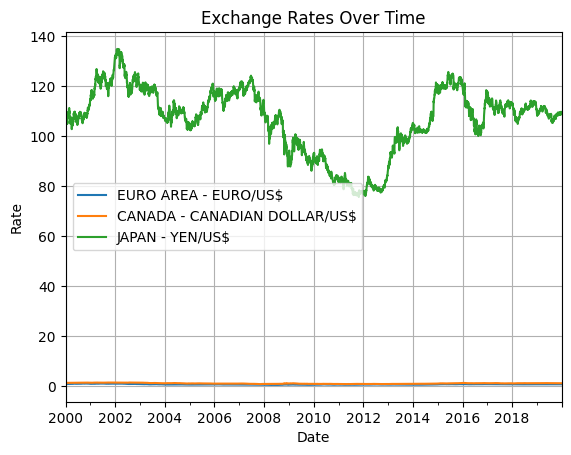

In [9]:
plt.figure(figsize=(15, 6))
df[["EURO AREA - EURO/US$", "CANADA - CANADIAN DOLLAR/US$", "JAPAN - YEN/US$"]].plot()
plt.title("Exchange Rates Over Time")
plt.ylabel("Rate")
plt.grid()
plt.show()

## **Correlation Heatmap:**

This heatmap shows how different currency rates are related to each other. A higher correlation means the rates move together. It helps us know if some currencies behave similarly, which might be useful in prediction.

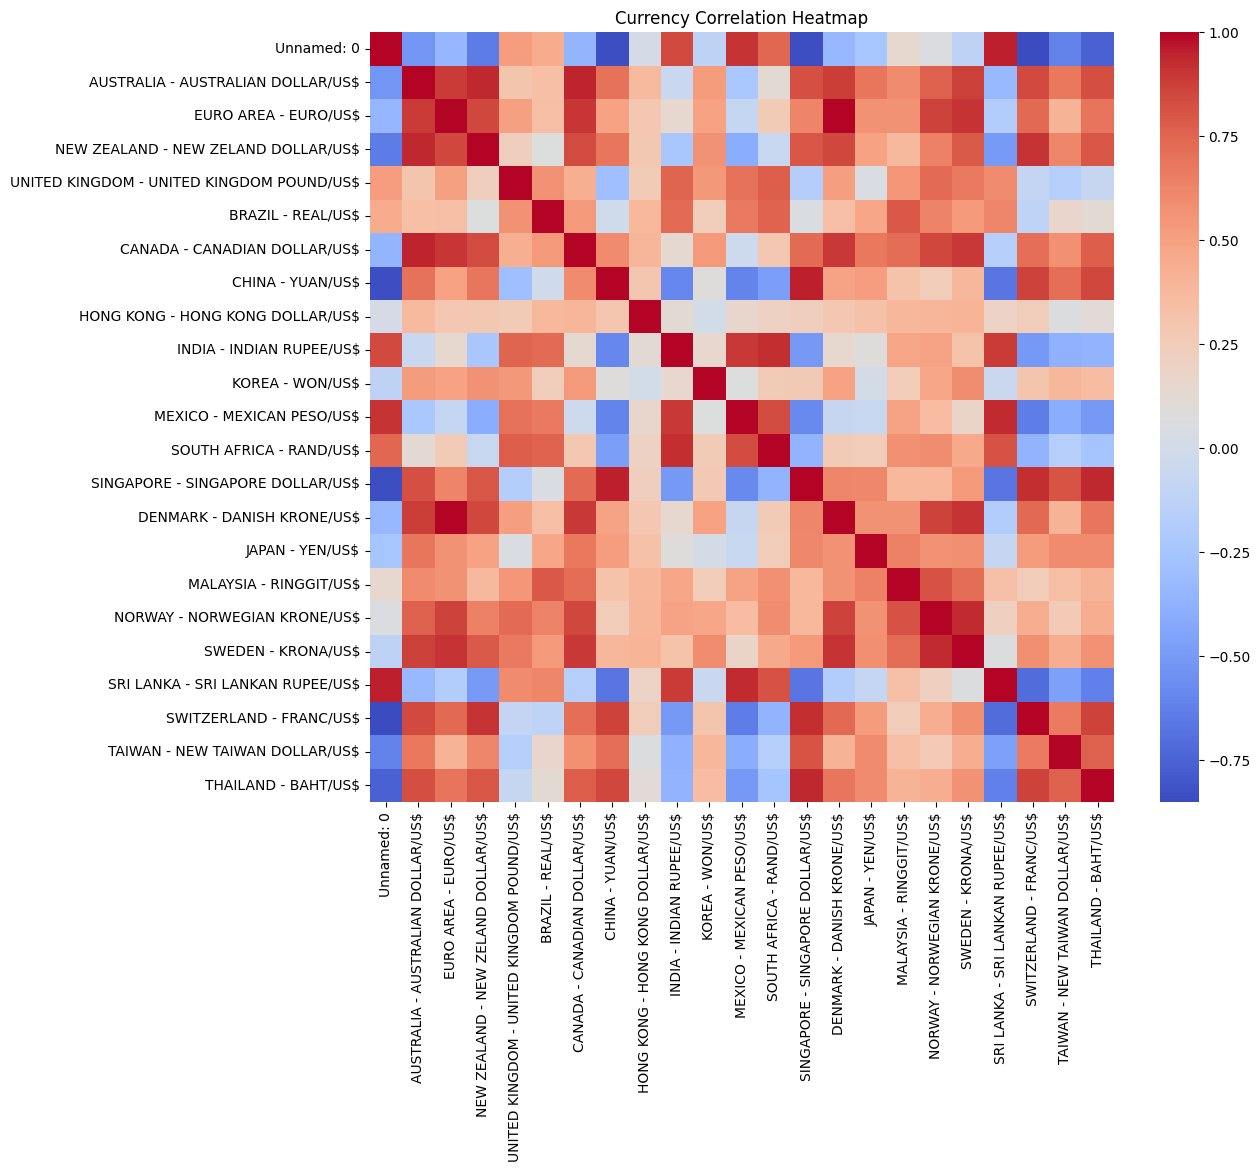

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Currency Correlation Heatmap")
plt.show()

## **Select EUR/USD and Normalize**

Here, we focus only on the EUR to USD exchange rate. Then we use a scaler to convert the values into a range between 0 and 1. This helps the deep learning models train more easily and faster.

In [11]:
data = df[["EURO AREA - EURO/US$"]].copy()
data.columns = ["EUR_USD"]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

## **Create Sequences:**

We split the data into sequences of 60 days as input and the next day as the output. This helps the model learn from past values. Each sequence is stored in arrays X (inputs) and y (outputs).

In [12]:
X, y = [], []
seq_len = 60

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM/GRU
X = X.reshape(X.shape[0], X.shape[1], 1)

## **Train-Test Split:**

We split the data into training and testing sets. The training set helps the model learn patterns, and the testing set checks if the model can make good predictions on new, unseen data.

In [13]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## **Build and Train LSTM:**

We build a model using LSTM (Long Short-Term Memory) and train it on the training data. LSTM is good at learning patterns over long time periods. The model learns to predict the EUR/USD rate based on past data.

In [14]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0167 - val_loss: 1.3347e-04
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 3.0757e-04 - val_loss: 1.2946e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.9352e-04 - val_loss: 1.2381e-04
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.8790e-04 - val_loss: 1.1360e-04
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.4022e-04 - val_loss: 1.0577e-04
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.4182e-04 - val_loss: 1.0535e-04
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.2192e-04 - val_loss: 9.7788e-05
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.0539e-04 - val_loss: 1.2575e-04
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.0115e-04 - val_loss: 9.1885e-05
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.7981e-04 - val_loss: 1.0723e-04
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.

## **Build and Train GRU:**

In this cell, we build a GRU (Gated Recurrent Unit) model. GRU is simpler and faster than LSTM. It also tries to predict the EUR/USD rate, and we train it on the same training data as LSTM.

In [15]:
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0681 - val_loss: 1.8560e-04
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.8937e-04 - val_loss: 1.4309e-04
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.4301e-04 - val_loss: 9.7552e-05
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.1322e-04 - val_loss: 1.0582e-04
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.8158e-04 - val_loss: 1.0135e-04
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.6624e-04 - val_loss: 8.5220e-05
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.5763e-04 - val_loss: 7.5002e-05
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.5824e-04 - val_loss: 7.5723e-05
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.4596e-04 - val_loss: 8.4453e-05
Epoch 10/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 1.5640e-04 - val_loss: 6.6902e-05


## **Make Predictions and Inverse Transform:**

We use both trained models to predict exchange rates on the test set. Then we convert the predictions back to the original value range using the scaler. This helps us compare the results with the real exchange rates.

In [16]:
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)

lstm_pred = scaler.inverse_transform(lstm_pred)
gru_pred = scaler.inverse_transform(gru_pred)
y_test_inv = scaler.inverse_transform(y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


## **Calculate RMSE:**

We calculate the RMSE (Root Mean Squared Error) for both models. RMSE tells us how far off the predictions are from the real values. A lower RMSE means the model made better predictions.

In [18]:
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_pred))
gru_rmse = np.sqrt(mean_squared_error(y_test_inv, gru_pred))

print(f"LSTM RMSE: {lstm_rmse:.4f}")
print(f"GRU RMSE: {gru_rmse:.4f}")

LSTM RMSE: 0.0045
GRU RMSE: 0.0048


## **Plot Predictions:**

This chart compares actual exchange rates with the predictions made by LSTM and GRU. We can visually see which model is closer to the real values and whether the models followed the trend correctly.

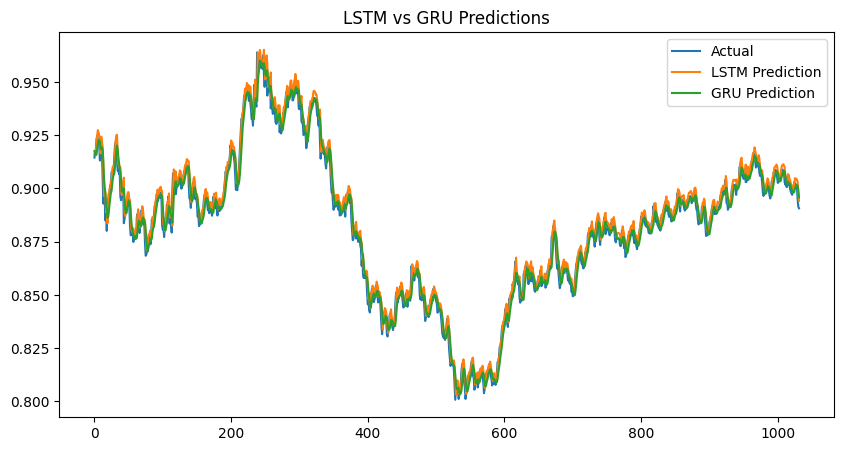

In [19]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_pred, label='LSTM Prediction')
plt.plot(gru_pred, label='GRU Prediction')
plt.legend()
plt.title('LSTM vs GRU Predictions')
plt.show()

## **Final Summary:**

### **Effectiveness of LSTM and GRU**

LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are both strong models used to predict time-based data, but each works better in different situations. LSTM is better when the data has long-term patterns or when past values affect future ones over a long time. It has a special memory system that helps it remember information for longer periods. This makes LSTM good for more complex data, but it also takes more time and power to train. On the other hand, GRU has a simpler design with fewer parts, so it trains faster and works well with smaller datasets or when the patterns in the data are short-term. If you're working with big, detailed data, LSTM might do a better job. But if you need quick results or have less data, GRU is a smart choice.